Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                512       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
3240/3240 [==============================] - 9s 3ms/step - loss: 36.0727 - val_loss: 23.8654
Epoch 2/50
3240/3240 [==============================] - 7s 2ms/step - loss: 22.6774 - val_loss: 19.3683
Epoch 3/50
3240/3240 [==============================] - 8s 2ms/step - loss: 19.0123 - val_loss: 17.6612
Epoc

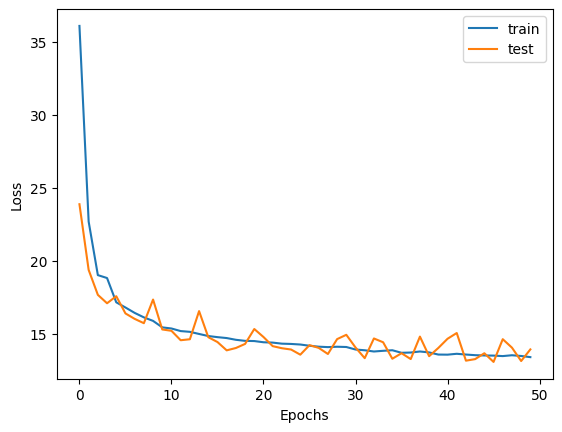

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load the NetCDF file
file_path = 'satellite_and_WOA13_1_degree_Jan_v2.nc'
data = xr.open_dataset(file_path)

# Extract the features and target variables
features = ['CHL', 'APH', 'FLU', 'PIC', 'POC', 'PAR', 'SST']
targets = ['nitrate', 'phosphate', 'silicate']

# Create a DataFrame for features
feature_data = pd.concat([data[var].to_dataframe().reset_index(drop=True) for var in features], axis=1)
feature_data.columns = features

# Create a DataFrame for targets
target_data = pd.concat([data[var].to_dataframe().reset_index(drop=True) for var in targets], axis=1)
target_data.columns = targets

# Handle missing values by filling them with the mean value of each column
feature_data = feature_data.fillna(feature_data.mean())
target_data = target_data.fillna(target_data.mean())

# Combine features and targets for splitting
combined_data = pd.concat([feature_data, target_data], axis=1)

# Split the data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)

# Separate features and targets
X_train = train_data[features].values
y_train = train_data[targets].values
X_test = test_data[features].values
y_test = test_data[targets].values

# Define the CNN model (removing the time dimension, using Dense layers directly)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3))  # 3 output neurons for the 3 target variables

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the trained model
model.save('trained_model.h5')

print("Model saved as 'trained_model.h5'")

Model saved as 'trained_model.h5'


In [ ]:
# Load the model
model = load_model('trained_model.h5')

# Print the model summary to verify it was loaded correctly
model.summary()

NameError: name 'load_model' is not defined